In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle
import json
import re
import warnings
warnings.filterwarnings("ignore")

#  1. Problem Statement

In [2]:
# Predict whether the policyholder will file a claim in the next 6 months or not

#  2. Data Gathering

In [3]:
# we have data on a csv file so we will read it while making a df

In [4]:
train_df = pd.read_csv(r"F:\Projects ML\model insurance will be claimed or not\train.csv")
train_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [5]:
# as we can see we are not able  to print all the features so we are using
pd.set_option('display.max_rows',100) # to display max 100 rows
pd.set_option('display.max_columns',50)  # to display max 50 columns/features
pd.options.display.float_format = '{:,.3f}'.format # to display values upto only 3 desimal
train_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.516,0.050,0.644,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.673,0.020,0.375,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841,0.020,0.385,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900,0.110,0.433,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.800,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596,0.110,0.635,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.000,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


#  3. EDA

In [6]:
# so here we  can see that we have features with object, float, integer values
train_df.info(memory_usage= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [7]:
# no null values found
train_df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [8]:
# no duplicate rows found
train_df.duplicated().sum()

0

In [9]:
train_df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,"58,592.000","58,592.000","58,592.000","58,592.000","58,592.000","58,592.000","58,592.000","58,592.000","58,592.000","58,592.000","58,592.000","58,592.000","58,592.000","58,592.000","58,592.000","58,592.000"
mean,0.611,0.069,0.469,"18,826.859",1.764,3.137,"1,162.356",3.627,5.245,4.853,"3,850.477","1,672.234","1,553.335","1,385.277",1.760,0.064
std,0.414,0.057,0.123,"17,660.175",1.137,1.833,266.305,0.484,0.430,0.228,311.457,112.089,79.622,212.423,1.390,0.245
min,0.003,0.000,0.288,290.000,1.000,1.000,796.000,3.000,5.000,4.500,"3,445.000","1,475.000","1,475.000","1,051.000",0.000,0.000
25%,0.210,0.020,0.365,"6,112.000",1.000,2.000,796.000,3.000,5.000,4.600,"3,445.000","1,515.000","1,475.000","1,185.000",0.000,0.000
50%,0.574,0.060,0.452,"8,794.000",1.000,2.000,"1,197.000",4.000,5.000,4.800,"3,845.000","1,735.000","1,530.000","1,335.000",2.000,0.000
75%,1.039,0.110,0.548,"27,003.000",3.000,6.000,"1,493.000",4.000,5.000,5.000,"3,995.000","1,755.000","1,635.000","1,510.000",3.000,0.000
max,1.397,1.000,1.000,"73,430.000",5.000,6.000,"1,498.000",4.000,6.000,5.200,"4,300.000","1,811.000","1,825.000","1,720.000",5.000,1.000


<AxesSubplot:>

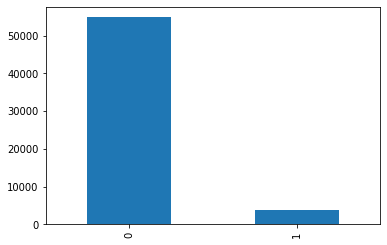

In [10]:
# highly imbalanced data
train_df["is_claim"].value_counts().plot(kind= "bar")

In [173]:
#saperating categorical and numerical features
categorical = train_df.select_dtypes(include =['object'])
categorical[["make", "airbags", "cylinder", "gear_box", "ncap_rating"]] = train_df[["make", "airbags", "cylinder", "gear_box", "ncap_rating"]]
print("Categorical Features in DataSet:",categorical.shape[1])

numerical= train_df.select_dtypes(include =[np.float64,np.int64])
numerical.drop(["make", "airbags", "cylinder", "gear_box", "ncap_rating"],axis = 1,inplace = True)
print("Numerical Features in DataSet:",numerical.shape[1])


Categorical Features in DataSet: 32
Numerical Features in DataSet: 10


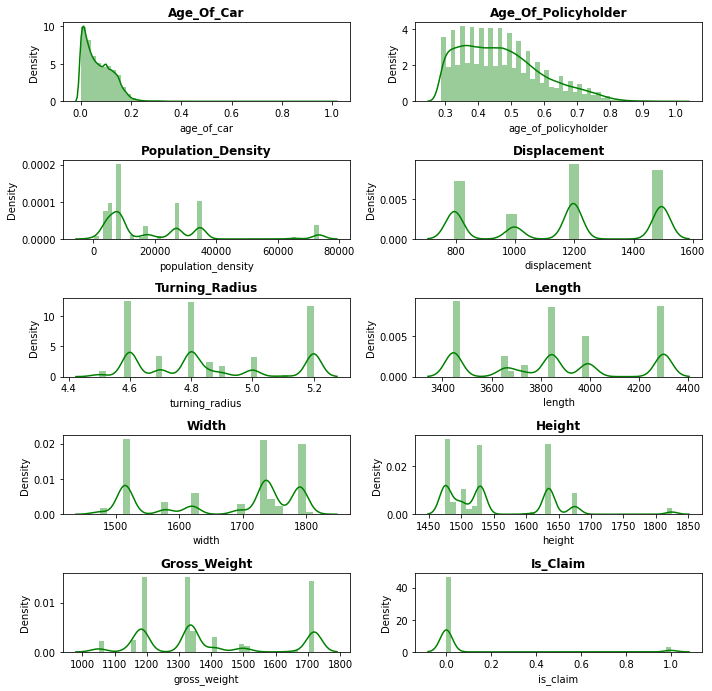

In [171]:
# here we are getting distribution of the data of countinuous features
plt.figure(figsize=(10,15))
for index,column in enumerate(numerical.columns):
    plot=plt.subplot(8,2,index+1)
    sns.distplot(train_df[column],color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

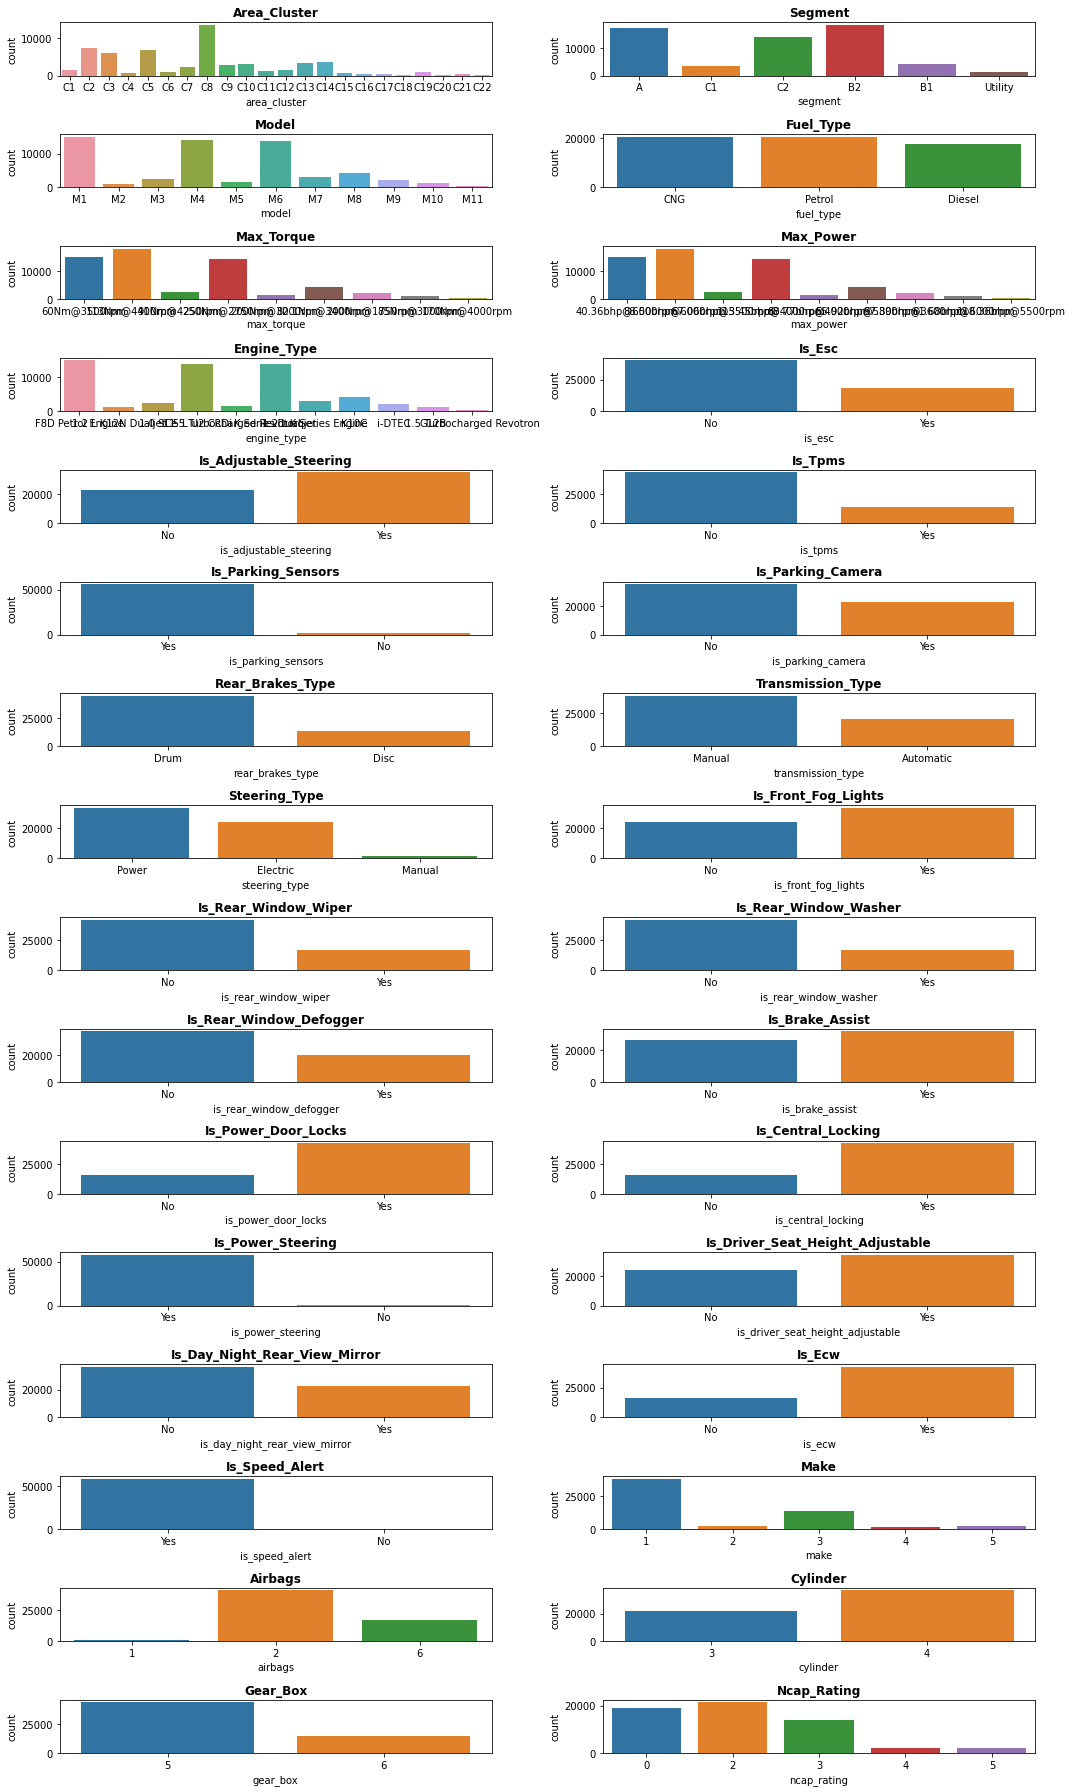

In [176]:
# getting countplot of all the categorical features
categorical = categorical.drop("policy_id",axis = 1)
plt.figure(figsize=(15,25))
for n,column in enumerate(categorical.columns):
    plot=plt.subplot(16,2,n+1)
    sns.countplot(train_df[column])
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

#### univariate analysis

###  1. policy_id

In [15]:
# we will drop this feature cause it has all the unique values, means no effect on the target variable
train_df["policy_id"].nunique() 

58592

### 2. policy_tenure

In [16]:
# we will drop this feature cause it has all the unique values, means no effect on the target variable
train_df["policy_tenure"].nunique()

58592

### 3. age_of_car 

In [17]:
train_df["age_of_car"].nunique()

49

(0.0, 1.0539346584488198)

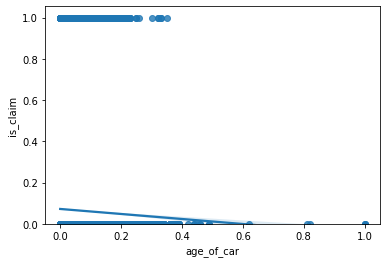

In [18]:
sns.regplot(x = "age_of_car", y = "is_claim", data = train_df)
plt.ylim(0,)

In [19]:
train_df["age_of_car"].skew()

1.0940812262542075

<AxesSubplot:xlabel='age_of_car', ylabel='Density'>

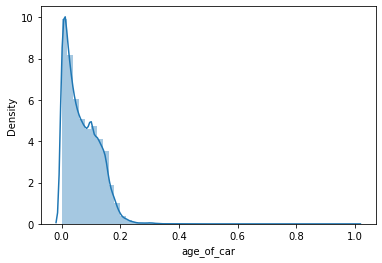

In [20]:
sns.distplot(train_df["age_of_car"]) # data is not normally distributed

<AxesSubplot:xlabel='age_of_car'>

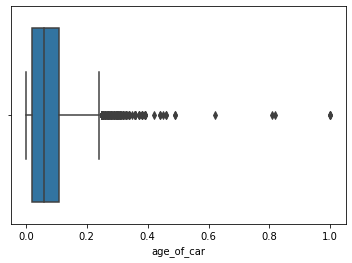

In [21]:
sns.boxplot(train_df["age_of_car"])

###  4. age_of_policyholder

In [22]:
train_df["age_of_policyholder"].nunique()

75

In [23]:
train_df["age_of_policyholder"].skew()

0.6400493147434646

<AxesSubplot:xlabel='age_of_policyholder', ylabel='Density'>

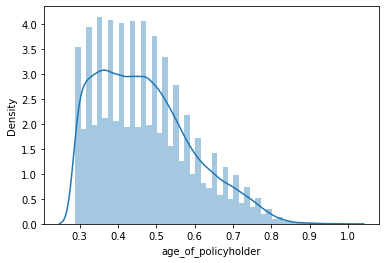

In [24]:
sns.distplot(train_df["age_of_policyholder"])

<AxesSubplot:>

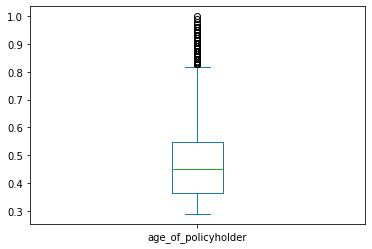

In [25]:
train_df["age_of_policyholder"].plot(kind = "box")

### 5. area_cluster

In [26]:
train_df["area_cluster"].value_counts()

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64

<AxesSubplot:xlabel='area_cluster', ylabel='count'>

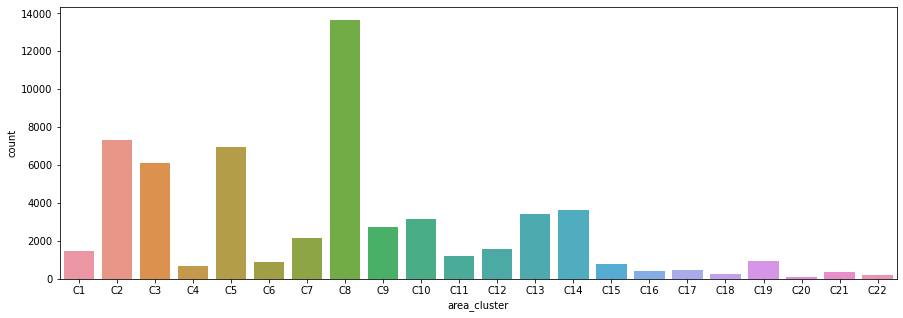

In [27]:
plt.figure(figsize = (15,5))
sns.countplot(train_df["area_cluster"])

### 6. population_density

In [28]:
train_df["population_density"].nunique()

22

<AxesSubplot:ylabel='Frequency'>

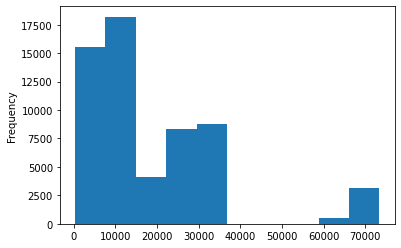

In [29]:
train_df["population_density"].plot(kind = "hist")

<AxesSubplot:xlabel='population_density', ylabel='count'>

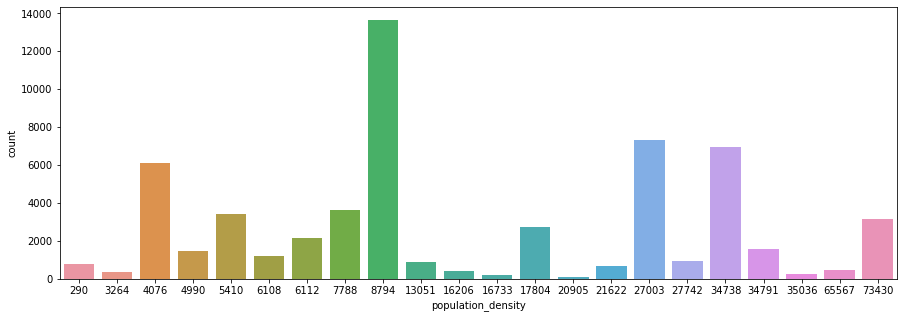

In [30]:
plt.figure(figsize = (15,5))
sns.countplot(train_df["population_density"])

### 7. make

In [31]:
train_df["make"].nunique()

5

<AxesSubplot:xlabel='make', ylabel='count'>

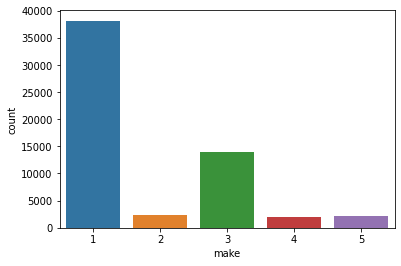

In [32]:
sns.countplot(train_df["make"])

### 8. segment

In [33]:
train_df["segment"].nunique()

6

<AxesSubplot:xlabel='segment', ylabel='count'>

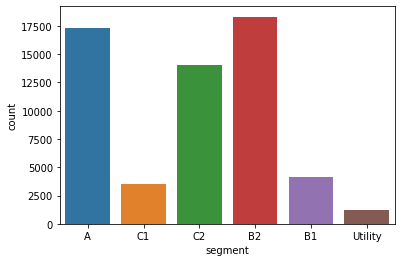

In [34]:
sns.countplot(train_df["segment"])

### 9. model

In [35]:
train_df["model"].nunique()

11

<AxesSubplot:xlabel='model', ylabel='count'>

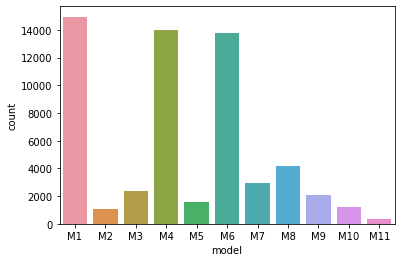

In [36]:
sns.countplot(train_df["model"])

### 10. fuel_type

In [37]:
train_df["fuel_type"].nunique()

3

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

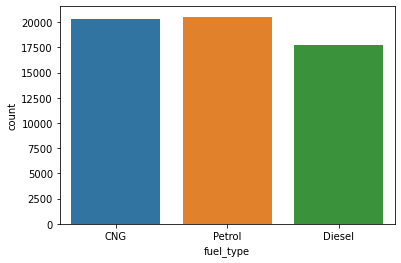

In [38]:
sns.countplot(train_df["fuel_type"])

In [39]:
pd.crosstab(train_df["fuel_type"],train_df["is_claim"]) # we have around equal ratio so no need this feature

is_claim,0,1
fuel_type,,
CNG,19095,1235
Diesel,16580,1150
Petrol,19169,1363


### 11. max_torque

In [40]:
train_df["max_torque"].nunique()

9

<AxesSubplot:xlabel='max_torque', ylabel='count'>

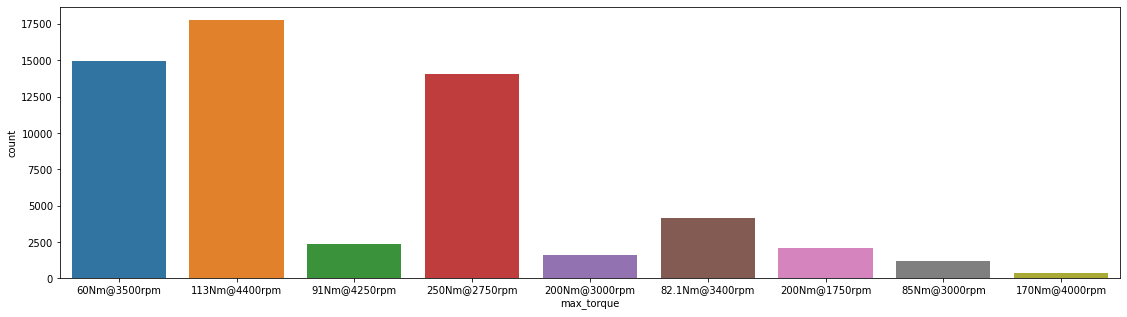

In [41]:
plt.figure(figsize = (19,5))
sns.countplot(train_df["max_torque"])

### 12. max_power

In [42]:
train_df["max_power"].nunique()

9

<AxesSubplot:xlabel='max_power', ylabel='count'>

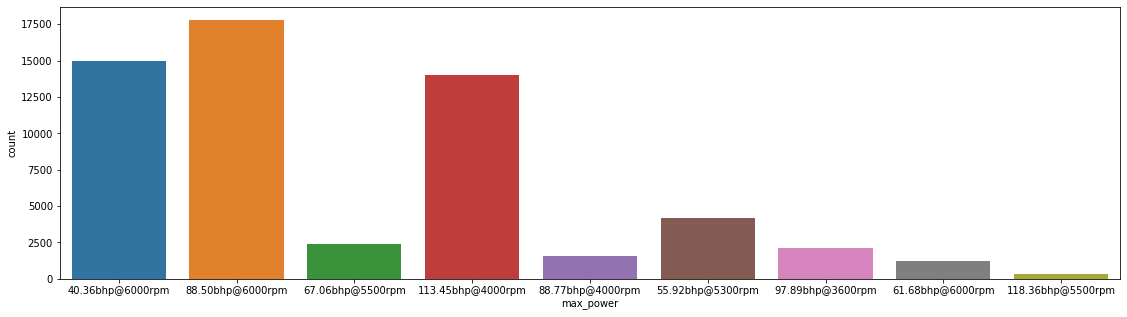

In [43]:
plt.figure(figsize = (19,5))
sns.countplot(train_df["max_power"])

### 13. engine_type

In [44]:
train_df["engine_type"].nunique()

11

<AxesSubplot:xlabel='engine_type', ylabel='count'>

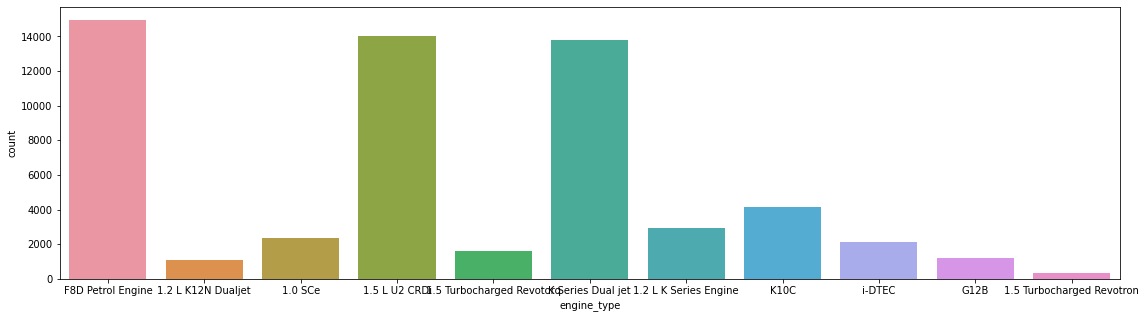

In [45]:
plt.figure(figsize = (19,5))
sns.countplot(train_df["engine_type"])

### 14. airbags

In [46]:
train_df["airbags"].nunique()

3

<AxesSubplot:xlabel='airbags', ylabel='count'>

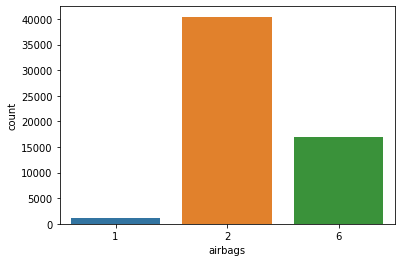

In [47]:
sns.countplot(train_df["airbags"])

### 15. is_esc

In [48]:
train_df["is_esc"].nunique()

2

<AxesSubplot:xlabel='is_esc', ylabel='count'>

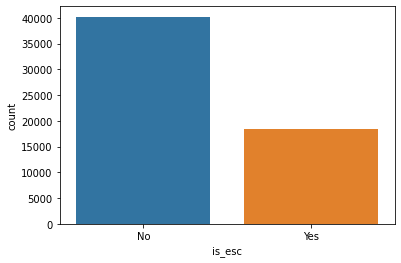

In [49]:
sns.countplot(train_df["is_esc"])

### 16. is_adjustable_steering

In [50]:
train_df["is_adjustable_steering"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='is_adjustable_steering', ylabel='count'>

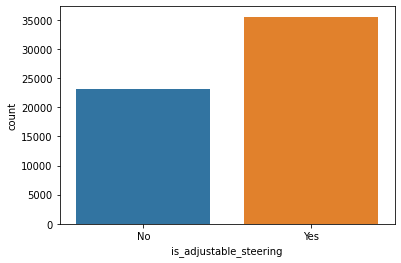

In [51]:
sns.countplot(train_df["is_adjustable_steering"])

### 17. is_tpms

In [52]:
train_df["is_tpms"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='is_tpms', ylabel='count'>

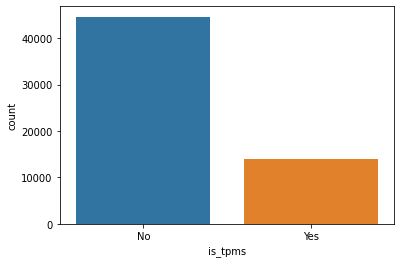

In [53]:
sns.countplot(train_df["is_tpms"])

### 18. is_parking_sensors

In [54]:
train_df["is_parking_sensors"].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='is_parking_sensors', ylabel='count'>

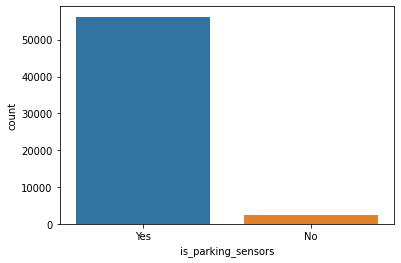

In [55]:
sns.countplot(train_df["is_parking_sensors"])

### 19. is_parking_camera

In [56]:
train_df["is_parking_camera"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='is_parking_camera', ylabel='count'>

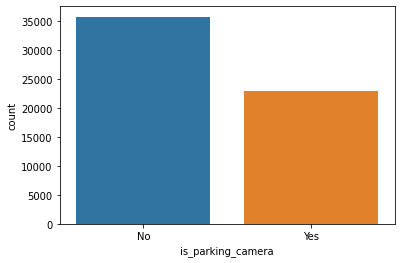

In [57]:
sns.countplot(train_df["is_parking_camera"])

### 20. rear_brakes_type

In [58]:
train_df["rear_brakes_type"].unique()

array(['Drum', 'Disc'], dtype=object)

<AxesSubplot:xlabel='rear_brakes_type', ylabel='count'>

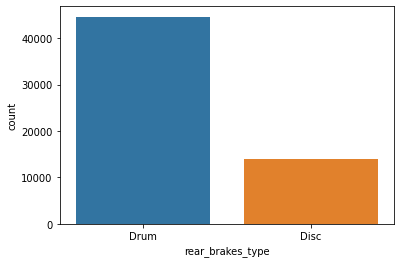

In [59]:
sns.countplot(train_df["rear_brakes_type"])

### 21. displacement

In [60]:
train_df["displacement"].unique()

array([ 796, 1197,  999, 1493, 1497,  998, 1498, 1196, 1199], dtype=int64)

<AxesSubplot:xlabel='displacement', ylabel='count'>

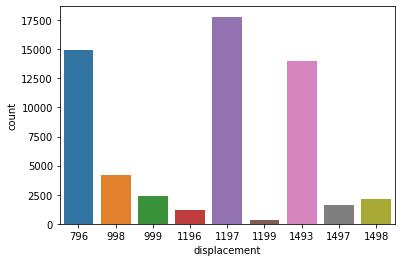

In [61]:
sns.countplot(train_df["displacement"])

### 22. cylinder

In [62]:
train_df["cylinder"].unique()

array([3, 4], dtype=int64)

<AxesSubplot:xlabel='cylinder', ylabel='count'>

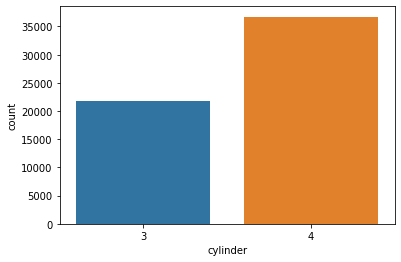

In [63]:
sns.countplot(train_df["cylinder"])

### 23. transmission_type

In [64]:
train_df["transmission_type"].unique()

array(['Manual', 'Automatic'], dtype=object)

<AxesSubplot:xlabel='transmission_type', ylabel='count'>

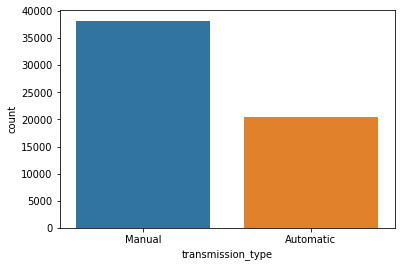

In [65]:
sns.countplot(train_df["transmission_type"])

### 24. gear_box

In [66]:
train_df["gear_box"].unique()

array([5, 6], dtype=int64)

<AxesSubplot:xlabel='gear_box', ylabel='count'>

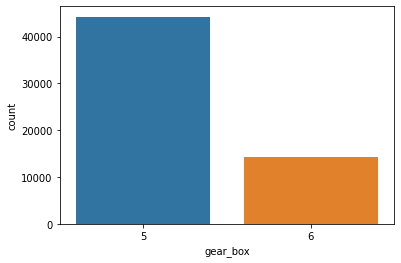

In [67]:
sns.countplot(train_df["gear_box"])

### 25. steering_type

In [68]:
train_df["steering_type"].unique()

array(['Power', 'Electric', 'Manual'], dtype=object)

<AxesSubplot:xlabel='steering_type', ylabel='count'>

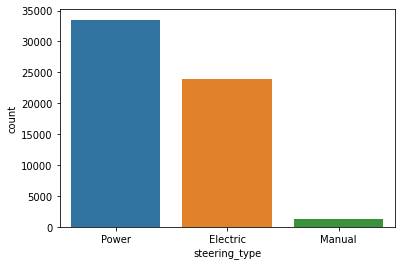

In [69]:
sns.countplot(train_df["steering_type"])

### 26. turning_radius

In [70]:
train_df["turning_radius"].unique()

array([4.6 , 4.8 , 5.  , 5.2 , 4.85, 4.7 , 4.9 , 4.5 , 5.1 ])

<AxesSubplot:xlabel='turning_radius', ylabel='Density'>

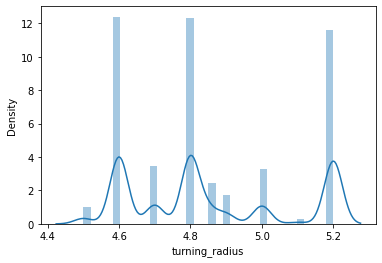

In [71]:
sns.distplot(train_df["turning_radius"])

### 27. length

In [72]:
train_df["length"].unique()

array([3445, 3995, 3731, 4300, 3990, 3845, 3655, 3675, 3993], dtype=int64)

<AxesSubplot:xlabel='length', ylabel='Density'>

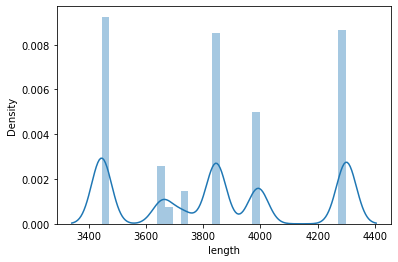

In [73]:
sns.distplot(train_df["length"])

### 28. width

In [74]:
train_df["width"].unique()

array([1515, 1735, 1579, 1790, 1755, 1745, 1620, 1695, 1475, 1811],
      dtype=int64)

<AxesSubplot:xlabel='width', ylabel='Density'>

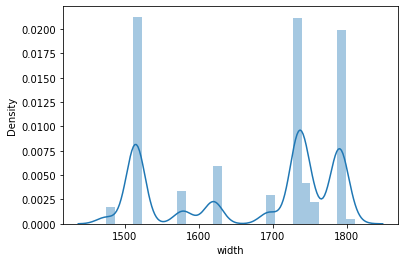

In [75]:
sns.distplot(train_df["width"])

### 29. height

In [76]:
train_df["height"].unique()

array([1475, 1515, 1490, 1635, 1523, 1530, 1500, 1675, 1501, 1825, 1606],
      dtype=int64)

<AxesSubplot:xlabel='height', ylabel='Density'>

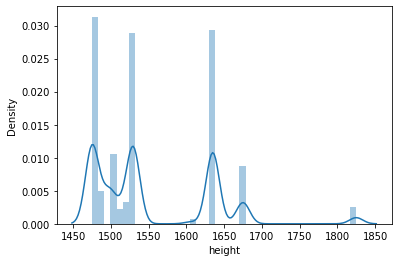

In [77]:
sns.distplot(train_df["height"])

### 30. gross_weight

In [78]:
train_df["gross_weight"].unique()

array([1185, 1335, 1155, 1720, 1490, 1410, 1340, 1051, 1510, 1660],
      dtype=int64)

<AxesSubplot:xlabel='gross_weight', ylabel='Density'>

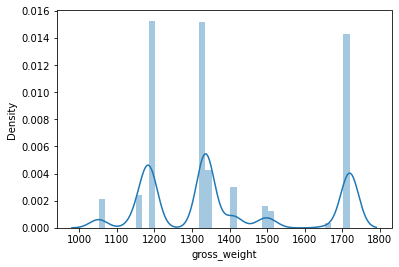

In [79]:
sns.distplot(train_df["gross_weight"])

### 31. is_front_fog_lights

In [80]:
train_df["is_front_fog_lights"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='is_front_fog_lights', ylabel='count'>

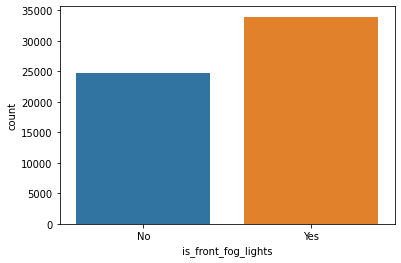

In [81]:
sns.countplot(train_df["is_front_fog_lights"])

In [82]:
pd.crosstab(train_df["is_front_fog_lights"], train_df["is_claim"])

is_claim,0,1
is_front_fog_lights,,
No,23170,1494
Yes,31674,2254


### 32. is_rear_window_wiper

In [83]:
train_df["is_rear_window_wiper"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='is_rear_window_wiper', ylabel='count'>

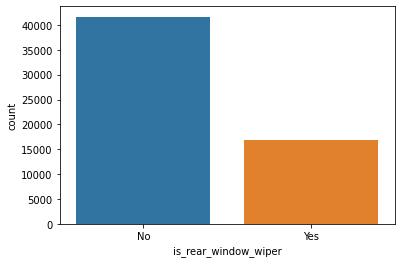

In [84]:
sns.countplot(train_df["is_rear_window_wiper"])

### 33. is_rear_window_washer

In [85]:
train_df["is_rear_window_washer"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='is_rear_window_washer', ylabel='count'>

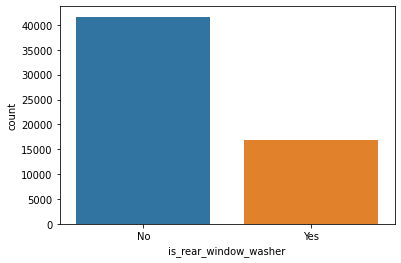

In [86]:
sns.countplot(train_df["is_rear_window_washer"])

### 34. is_rear_window_defogger

In [87]:
train_df["is_rear_window_defogger"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='is_rear_window_defogger', ylabel='count'>

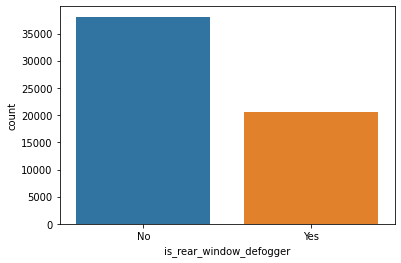

In [88]:
sns.countplot(train_df["is_rear_window_defogger"])

### 35. is_brake_assist

In [89]:
train_df["is_brake_assist"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='is_brake_assist', ylabel='count'>

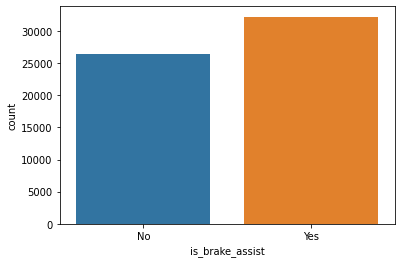

In [90]:
sns.countplot(train_df["is_brake_assist"])

### 36. is_power_door_locks

In [91]:
train_df["is_power_door_locks"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='is_power_door_locks', ylabel='count'>

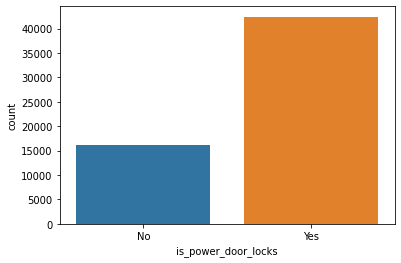

In [92]:
sns.countplot(train_df["is_power_door_locks"])

### 37. is_central_locking

In [93]:
train_df["is_central_locking"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='is_central_locking', ylabel='count'>

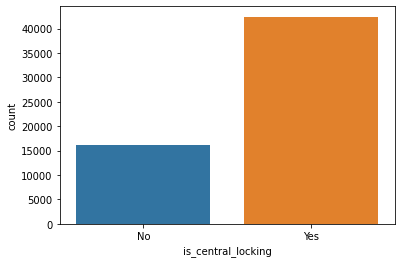

In [94]:
sns.countplot(train_df["is_central_locking"])

### 38. is_power_steering

In [95]:
train_df["is_power_steering"].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='is_power_steering', ylabel='count'>

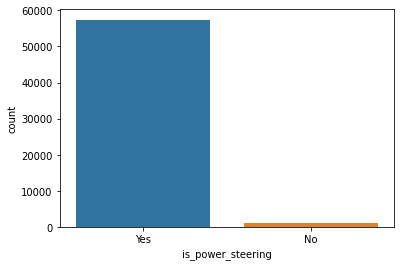

In [96]:
sns.countplot(train_df["is_power_steering"])

### 39. is_driver_seat_height_adjustable

In [97]:
train_df["is_driver_seat_height_adjustable"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='is_driver_seat_height_adjustable', ylabel='count'>

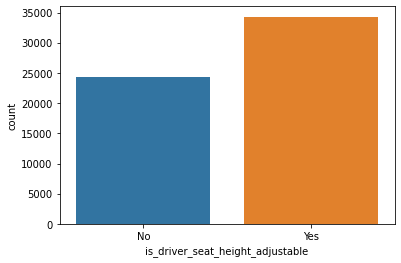

In [98]:
sns.countplot(train_df["is_driver_seat_height_adjustable"])

### 40. is_day_night_rear_view_mirror

In [99]:
train_df["is_day_night_rear_view_mirror"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='is_day_night_rear_view_mirror', ylabel='count'>

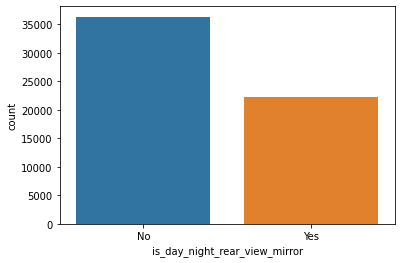

In [100]:
sns.countplot(train_df["is_day_night_rear_view_mirror"])

### 41. is_ecw

In [101]:
train_df["is_ecw"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='is_ecw', ylabel='count'>

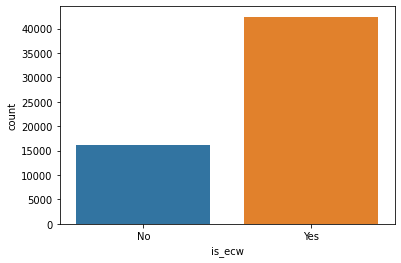

In [102]:
sns.countplot(train_df["is_ecw"])

### 42. is_speed_alert

In [103]:
train_df["is_speed_alert"].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='is_speed_alert', ylabel='count'>

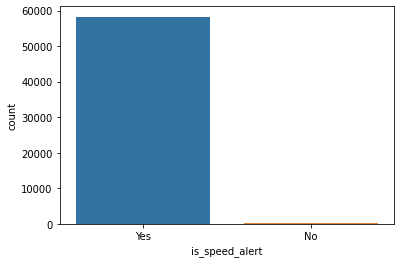

In [104]:
sns.countplot(train_df["is_speed_alert"])

### 43. ncap_rating

In [105]:
train_df["ncap_rating"].unique()

array([0, 2, 3, 5, 4], dtype=int64)

<AxesSubplot:xlabel='ncap_rating', ylabel='count'>

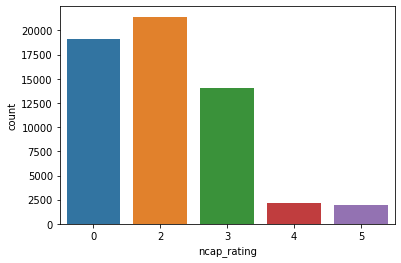

In [106]:
sns.countplot(train_df["ncap_rating"])

### multivariate analysys

<AxesSubplot:xlabel='is_claim'>

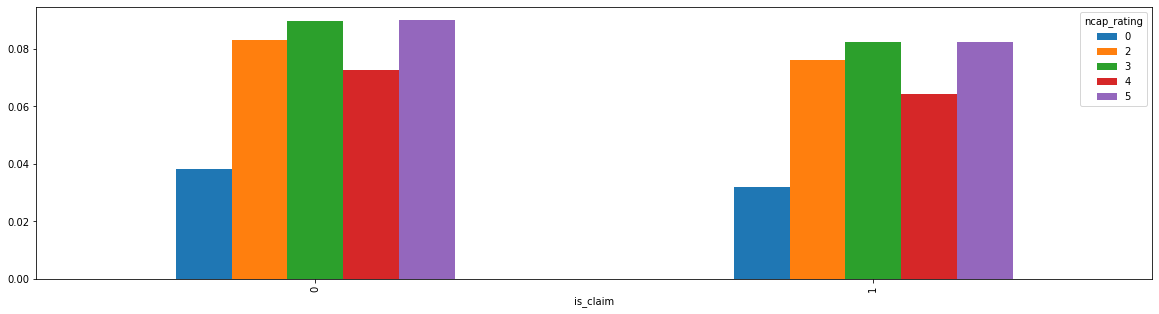

In [184]:
pd.pivot_table(data = train_df,index = "is_claim", columns ="ncap_rating",values = "age_of_car" ).plot(kind = "bar",figsize = (20,5))

In [186]:
pd.crosstab(train_df.ncap_rating,train_df["is_claim"]) 

is_claim,0,1
ncap_rating,,
0,17905,1192
2,20011,1391
3,13117,901
4,1981,133
5,1830,131


In [193]:
pd.crosstab(train_df.is_speed_alert,[train_df.is_claim,train_df.ncap_rating])

is_claim            0                               1                     
ncap_rating         0      2      3     4     5     0     2    3    4    5
is_speed_alert                                                            
No                  0      0      0     0   348     0     0    0    0   15
Yes             17905  20011  13117  1981  1482  1192  1391  901  133  116

<AxesSubplot:>

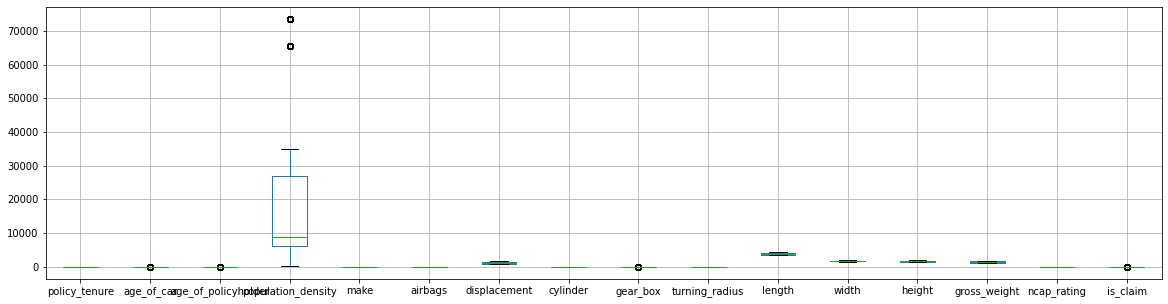

In [107]:
plt.figure(figsize = (20,5))
train_df.select_dtypes(include =["number"]).boxplot()

<AxesSubplot:xlabel='population_density'>

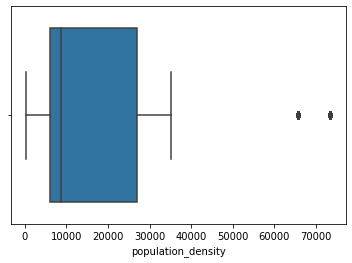

In [108]:
# as we can see only population density col has outliers
sns.boxplot(train_df.population_density)

In [109]:
train_df.select_dtypes(include =["number"]).head(5)
# here we can see some features has high scaled data so we will do scaling on them

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,0.516,0.050,0.644,4990,1,2,796,3,5,4.600,3445,1515,1475,1185,0,0
1,0.673,0.020,0.375,27003,1,2,796,3,5,4.600,3445,1515,1475,1185,0,0
2,0.841,0.020,0.385,4076,1,2,796,3,5,4.600,3445,1515,1475,1185,0,0
3,0.900,0.110,0.433,21622,1,2,1197,4,5,4.800,3995,1735,1515,1335,2,0
4,0.596,0.110,0.635,34738,2,2,999,3,5,5.000,3731,1579,1490,1155,2,0


# Feature Engineering

In [110]:
# policy_id, policy_tenure has all the unique values, 
#it means not give the information to target so we will drop them
train_df.drop(["policy_id","policy_tenure"],axis = 1, inplace = True)
train_df.head(1)

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.050,0.644,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0


In [111]:
# encode the features with dtype == objects
df1 = train_df.copy()

In [112]:
label = OrdinalEncoder()
a = df1["area_cluster"].unique()
df1["area_cluster"] = label.fit_transform(df1[["area_cluster"]]).astype(int)
b = df1["area_cluster"].unique()
pd.Series(b, index = a)

C1      0
C2     11
C3     15
C4     16
C5     17
C6     18
C7     19
C8     20
C9     21
C10     1
C11     2
C12     3
C13     4
C14     5
C15     6
C16     7
C17     8
C18     9
C19    10
C20    12
C21    13
C22    14
dtype: int32

In [113]:
label = OrdinalEncoder()
a = df1["segment"].unique()
df1["segment"] = label.fit_transform(df1[["segment"]]).astype(int)
b = df1["segment"].unique()
pd.Series(b, index = a)

A          0
C1         3
C2         4
B2         2
B1         1
Utility    5
dtype: int32

In [114]:
label = OrdinalEncoder()
a = df1["model"].unique()
df1["model"] = label.fit_transform(df1[["model"]]).astype(int)
b = df1["model"].unique()
pd.Series(b, index = a)

M1      0
M2      3
M3      4
M4      5
M5      6
M6      7
M7      8
M8      9
M9     10
M10     1
M11     2
dtype: int32

In [115]:
label = OrdinalEncoder()
a = df1["fuel_type"].unique()
df1["fuel_type"] = label.fit_transform(df1[["fuel_type"]]).astype(int)
b = df1["fuel_type"].unique()
pd.Series(b, index = a)                       

CNG       0
Petrol    2
Diesel    1
dtype: int32

In [116]:
label = OrdinalEncoder()
a = df1["engine_type"].unique()
df1["engine_type"] = label.fit_transform(df1[["engine_type"]]).astype(int)
b = df1["engine_type"].unique()
pd.Series(b, index = a)

F8D Petrol Engine             6
1.2 L K12N Dualjet            2
1.0 SCe                       0
1.5 L U2 CRDi                 3
1.5 Turbocharged Revotorq     4
K Series Dual jet             8
1.2 L K Series Engine         1
K10C                          9
i-DTEC                       10
G12B                          7
1.5 Turbocharged Revotron     5
dtype: int32

In [117]:
label = OrdinalEncoder()
a = df1["is_esc"].unique()
df1["is_esc"] = label.fit_transform(df1[["is_esc"]]).astype(int)
b = df1["is_esc"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [118]:
label = OrdinalEncoder()
a = df1["is_adjustable_steering"].unique()
df1["is_adjustable_steering"] = label.fit_transform(df1[["is_adjustable_steering"]]).astype(int)
b = df1["is_adjustable_steering"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [119]:
label = OrdinalEncoder()
a = df1["is_tpms"].unique()
df1["is_tpms"] = label.fit_transform(df1[["is_tpms"]]).astype(int)
b = df1["is_tpms"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [120]:
label = OrdinalEncoder()
a = df1["is_parking_sensors"].unique()
df1["is_parking_sensors"] = label.fit_transform(df1[["is_parking_sensors"]]).astype(int)
b = df1["is_parking_sensors"].unique()
pd.Series(b, index = a)

Yes    1
No     0
dtype: int32

In [121]:
label = OrdinalEncoder()
a = df1["is_parking_camera"].unique()
df1["is_parking_camera"] = label.fit_transform(df1[["is_parking_camera"]]).astype(int)
b = df1["is_parking_camera"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [122]:
label = OrdinalEncoder()
a = df1["rear_brakes_type"].unique()
df1["rear_brakes_type"] = label.fit_transform(df1[["rear_brakes_type"]]).astype(int)
b = df1["rear_brakes_type"].unique()
pd.Series(b, index = a)

Drum    1
Disc    0
dtype: int32

In [123]:
label = OrdinalEncoder()
a = df1["transmission_type"].unique()
df1["transmission_type"] = label.fit_transform(df1[["transmission_type"]]).astype(int)
b = df1["transmission_type"].unique()
pd.Series(b, index = a)

Manual       1
Automatic    0
dtype: int32

In [124]:
label = OrdinalEncoder()
a = df1["steering_type"].unique()
df1["steering_type"] = label.fit_transform(df1[["steering_type"]]).astype(int)
b = df1["steering_type"].unique()
pd.Series(b, index = a)

Power       2
Electric    0
Manual      1
dtype: int32

In [125]:
label = OrdinalEncoder()
a = df1["is_front_fog_lights"].unique()
df1["is_front_fog_lights"] = label.fit_transform(df1[["is_front_fog_lights"]]).astype(int)
b = df1["is_front_fog_lights"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [126]:
label = OrdinalEncoder()
a = df1["is_rear_window_wiper"].unique()
df1["is_rear_window_wiper"] = label.fit_transform(df1[["is_rear_window_wiper"]]).astype(int)
b = df1["is_rear_window_wiper"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [127]:
label = OrdinalEncoder()
a = df1["is_rear_window_washer"].unique()
df1["is_rear_window_washer"] = label.fit_transform(df1[["is_rear_window_washer"]]).astype(int)
b = df1["is_rear_window_washer"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [128]:
label = OrdinalEncoder()
a = df1["is_rear_window_defogger"].unique()
df1["is_rear_window_defogger"] = label.fit_transform(df1[["is_rear_window_defogger"]]).astype(int)
b = df1["is_rear_window_defogger"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [129]:
label = OrdinalEncoder()
a = df1["is_brake_assist"].unique()
df1["is_brake_assist"] = label.fit_transform(df1[["is_brake_assist"]]).astype(int)
b = df1["is_brake_assist"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [130]:
label = OrdinalEncoder()
a = df1["is_power_door_locks"].unique()
df1["is_power_door_locks"] = label.fit_transform(df1[["is_power_door_locks"]]).astype(int)
b = df1["is_power_door_locks"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [131]:
label = OrdinalEncoder()
a = df1["is_central_locking"].unique()
df1["is_central_locking"] = label.fit_transform(df1[["is_central_locking"]]).astype(int)
b = df1["is_central_locking"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [132]:
label = OrdinalEncoder()
a = df1["is_power_steering"].unique()
df1["is_power_steering"] = label.fit_transform(df1[["is_power_steering"]]).astype(int)
b = df1["is_power_steering"].unique()
pd.Series(b, index = a)

Yes    1
No     0
dtype: int32

In [133]:
label = OrdinalEncoder()
a = df1["is_driver_seat_height_adjustable"].unique()
df1["is_driver_seat_height_adjustable"] = label.fit_transform(df1[["is_driver_seat_height_adjustable"]]).astype(int)
b = df1["is_driver_seat_height_adjustable"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [134]:
label = OrdinalEncoder()
a = df1["is_day_night_rear_view_mirror"].unique()
df1["is_day_night_rear_view_mirror"] = label.fit_transform(df1[["is_day_night_rear_view_mirror"]]).astype(int)
b = df1["is_day_night_rear_view_mirror"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [135]:
label = OrdinalEncoder()
a = df1["is_ecw"].unique()
df1["is_ecw"] = label.fit_transform(df1[["is_ecw"]]).astype(int)
b = df1["is_ecw"].unique()
pd.Series(b, index = a)

No     0
Yes    1
dtype: int32

In [136]:
label = OrdinalEncoder()
a = df1["is_speed_alert"].unique()
df1["is_speed_alert"] = label.fit_transform(df1[["is_speed_alert"]]).astype(int)
b = df1["is_speed_alert"].unique()
pd.Series(b, index = a)

Yes    1
No     0
dtype: int32

In [137]:
# we have two featuers max_torque,max_power with noisy data, so we will do some preprocessing

In [138]:
df1.max_torque = df1.max_torque.apply(lambda x : eval(re.sub("[a-zA-Z]","",x.split("@")[0])))
df1.max_torque

0        60.000
1        60.000
2        60.000
3       113.000
4        91.000
          ...  
58587    91.000
58588    60.000
58589    60.000
58590   113.000
58591   250.000
Name: max_torque, Length: 58592, dtype: float64

In [139]:
df1 = df1.rename({"max_torque":"max_torque_nm"},axis = 1)
df1.max_torque_nm

0        60.000
1        60.000
2        60.000
3       113.000
4        91.000
          ...  
58587    91.000
58588    60.000
58589    60.000
58590   113.000
58591   250.000
Name: max_torque_nm, Length: 58592, dtype: float64

In [140]:
df1.max_power = df1.max_power.apply(lambda x : eval(re.sub("[a-zA-Z]","",x.split("@")[0])))
df1 = df1.rename({"max_power":"max_power_bhp"},axis = 1)
df1.max_power_bhp

0        40.360
1        40.360
2        40.360
3        88.500
4        67.060
          ...  
58587    67.060
58588    40.360
58589    40.360
58590    88.500
58591   113.450
Name: max_power_bhp, Length: 58592, dtype: float64

In [141]:
# scaling on the high scaled data
# we should split out data into train and test before using scaling so that there is no data leakage
x,y = df1.drop("is_claim", axis = 1), df1["is_claim"]
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state=42, stratify=y)

In [142]:
# scaling the training dataset
std = StandardScaler()
arr = std.fit_transform(x_train[["population_density","displacement","length",
                                 "width","height","gross_weight","max_torque_nm", "max_power_bhp"]])
x_train[["population_density","displacement","length","width",
         "height","gross_weight","max_torque_nm", "max_power_bhp"]] = arr
x_train.head()


,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque_nm,max_power_bhp,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
47135,0.180,0.471,17,0.901,1,3,3,2,-0.295,0.342,2,2,1,1,0,1,1,1,0.127,4,0,5,0,4.800,0.463,0.558,-0.483,-0.237,1,0,0,1,1,1,1,1,1,1,1,1,2
58128,0.090,0.337,4,-0.760,1,1,9,0,-0.718,-0.836,9,2,0,0,0,1,0,1,-0.621,3,1,5,2,4.700,-0.630,-0.469,1.526,-0.214,0,0,0,0,0,1,1,1,0,0,1,1,2
35000,0.030,0.606,20,-0.568,1,2,7,2,-0.295,0.342,8,2,0,1,0,1,0,1,0.127,4,1,5,0,4.800,-0.020,0.558,-0.294,-0.237,1,0,0,0,1,1,1,1,1,1,1,1,2
6078,0.080,0.644,17,0.901,1,2,7,2,-0.295,0.342,8,2,0,1,0,1,0,1,0.127,4,1,5,0,4.800,-0.020,0.558,-0.294,-0.237,1,0,0,0,1,1,1,1,1,1,1,1,2
34780,0.010,0.529,4,-0.760,1,0,0,0,-1.020,-1.398,6,2,0,0,0,1,0,1,-1.380,3,1,5,2,4.600,-1.305,-1.406,-0.985,-0.943,0,0,0,0,0,0,0,1,0,0,0,1,0


In [143]:
# scaling the testing dataset
std = StandardScaler()
arr1 = std.fit_transform(x_test[["population_density","displacement","length",
                                 "width","height","gross_weight","max_torque_nm", "max_power_bhp"]])
x_test[["population_density","displacement","length","width","height",
        "gross_weight","max_torque_nm", "max_power_bhp"]] = arr1
x_test.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque_nm,max_power_bhp,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
38215,0.030,0.423,17,0.902,3,4,5,1,1.584,1.249,3,6,1,1,1,1,1,0,1.249,4,0,6,2,5.200,1.444,1.056,1.034,1.580,1,1,1,1,1,1,1,1,1,0,1,1,3
3597,0.040,0.538,1,3.093,1,0,0,0,-1.009,-1.377,6,2,0,0,0,1,0,1,-1.359,3,1,5,2,4.600,-1.288,-1.389,-0.980,-0.941,0,0,0,0,0,0,0,1,0,0,0,1,0
32004,0.010,0.394,19,-0.720,1,0,0,0,-1.009,-1.377,6,2,0,0,0,1,0,1,-1.359,3,1,5,2,4.600,-1.288,-1.389,-0.980,-0.941,0,0,0,0,0,0,0,1,0,0,0,1,0
20540,0.020,0.308,4,-0.759,3,4,5,1,1.584,1.249,3,6,1,1,1,1,1,0,1.249,4,0,6,2,5.200,1.444,1.056,1.034,1.580,1,1,1,1,1,1,1,1,1,0,1,1,3
55338,0.090,0.317,17,0.902,1,3,3,2,-0.285,0.353,2,2,1,1,0,1,1,1,0.141,4,0,5,0,4.800,0.470,0.567,-0.477,-0.234,1,0,0,1,1,1,1,1,1,1,1,1,2


# Feature Selection

<AxesSubplot:>

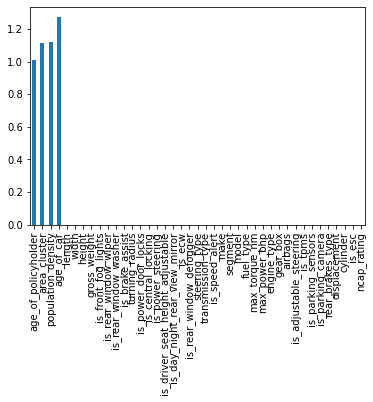

In [144]:
# VIF
vif_lst = []
for i in range(x_train.shape[1]):
    vif = variance_inflation_factor(x_train.to_numpy(),i)
    vif_lst.append(vif)
s_ = pd.Series(vif_lst,index = x_train.columns)
s_.sort_values().plot(kind = "bar")

In [145]:
# Checking Variance Threshold 
var_thr = VarianceThreshold()
var_thr.fit_transform(x_train)
pd.Series(var_thr.get_support(),index = x_train.columns)

age_of_car                          True
age_of_policyholder                 True
area_cluster                        True
population_density                  True
make                                True
segment                             True
model                               True
fuel_type                           True
max_torque_nm                       True
max_power_bhp                       True
engine_type                         True
airbags                             True
is_esc                              True
is_adjustable_steering              True
is_tpms                             True
is_parking_sensors                  True
is_parking_camera                   True
rear_brakes_type                    True
displacement                        True
cylinder                            True
transmission_type                   True
gear_box                            True
steering_type                       True
turning_radius                      True
length          

In [146]:
# checking for Information gain
arr2 = mutual_info_classif(x_train,y_train)
pd.Series(arr2,index = x_train.columns)

age_of_car                         0.000
age_of_policyholder                0.000
area_cluster                       0.004
population_density                 0.000
make                               0.003
segment                            0.004
model                              0.002
fuel_type                          0.004
max_torque_nm                      0.001
max_power_bhp                      0.002
engine_type                        0.003
airbags                            0.004
is_esc                             0.002
is_adjustable_steering             0.003
is_tpms                            0.000
is_parking_sensors                 0.009
is_parking_camera                  0.002
rear_brakes_type                   0.006
displacement                       0.001
cylinder                           0.005
transmission_type                  0.005
gear_box                           0.006
steering_type                      0.008
turning_radius                     0.001
length          

In [147]:
# checkiing for chi_square it is used between categorical and categorical data
x_train1 = x_train[["area_cluster","make","segment","model","fuel_type",
                   "engine_type","airbags","is_esc","is_adjustable_steering",
                   "is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type",
                   "cylinder","transmission_type","gear_box","steering_type",
                   "is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer",
                   "is_rear_window_defogger","is_brake_assist","is_power_door_locks",
                   "is_central_locking","is_power_steering","is_driver_seat_height_adjustable",
                   "is_day_night_rear_view_mirror","is_ecw","is_speed_alert","ncap_rating"]]
from sklearn.feature_selection import chi2
chi,p_val = chi2(x_train1,y_train)
pd.DataFrame({"Chi2_value": chi, "P_value": p_val}, index = x_train1.columns)

,Chi2_value,P_value
area_cluster,21.134,0.000
make,0.273,0.601
segment,1.504,0.220
model,2.952,0.086
fuel_type,3.499,0.061
engine_type,0.558,0.455
airbags,0.003,0.955
is_esc,0.000,0.998
is_adjustable_steering,3.382,0.066
is_tpms,0.156,0.692


In [148]:
# taking annova test , it is used between coutinuous and categorical

from sklearn.feature_selection import f_classif
x_train2 = x_train.drop(["area_cluster","make","segment","model","fuel_type",
                   "engine_type","airbags","is_esc","is_adjustable_steering",
                   "is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type",
                   "cylinder","transmission_type","gear_box","steering_type",
                   "is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer",
                   "is_rear_window_defogger","is_brake_assist","is_power_door_locks",
                   "is_central_locking","is_power_steering","is_driver_seat_height_adjustable",
                   "is_day_night_rear_view_mirror","is_ecw","is_speed_alert","ncap_rating"],axis = 1)
f_val,p_vall = f_classif(x_train2,y_train)
pd.DataFrame({"F_Value": f_val,"P_value":p_vall}, index = x_train2.columns)

,F_Value,P_value
age_of_car,35.220,0.000
age_of_policyholder,22.539,0.000
population_density,18.393,0.000
max_torque_nm,0.167,0.682
max_power_bhp,1.801,0.180
displacement,1.742,0.187
turning_radius,0.000,0.985
length,0.847,0.358
width,3.562,0.059
height,0.556,0.456


In [149]:
# after conducting all the tests i have concluded that we will drop the poor score features
x_trn = x_train.drop(["is_rear_window_defogger","is_power_door_locks","is_brake_assist",
                   "is_central_locking","is_driver_seat_height_adjustable","is_brake_assist",
                   "is_day_night_rear_view_mirror","is_ecw","ncap_rating", "is_speed_alert",
                      "is_rear_window_washer","is_rear_window_wiper","is_front_fog_lights",
                      "cylinder","is_tpms","is_adjustable_steering", "is_esc","airbags","is_power_steering",
                       "is_parking_camera","max_torque_nm", "max_power_bhp","displacement","turning_radius",
                      "length","is_parking_sensors","width","height","gross_weight"],axis = 1)
x_tst = x_test.drop(["is_rear_window_defogger","is_power_door_locks","is_brake_assist",
                   "is_central_locking","is_driver_seat_height_adjustable","is_brake_assist",
                   "is_day_night_rear_view_mirror","is_ecw","ncap_rating", "is_speed_alert",
                      "is_rear_window_washer","is_rear_window_wiper","is_front_fog_lights",
                      "cylinder","is_tpms","is_adjustable_steering", "is_esc","airbags","is_power_steering",
                       "is_parking_camera","max_torque_nm", "max_power_bhp","displacement","turning_radius",
                      "length","is_parking_sensors","width","height","gross_weight"],axis = 1)

<AxesSubplot:xlabel='is_claim', ylabel='count'>

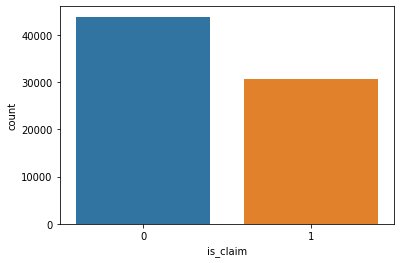

In [150]:
# before model training we should balance our data in order to get good accuracy
smt = SMOTE(sampling_strategy= 0.7,random_state=42)
smt_x,smt_y = smt.fit_resample(x_trn,y_train)
sns.countplot(smt_y)

# model selection and training

In [151]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [152]:
model_list = [("LogisticRegression", lr),("DecisionTreeClassifier", dt),
              ("RandomForestClassifier", rf),("KNeighborsClassifier", kn)]

for name, model in model_list:
    model.fit(smt_x, smt_y)
    y_pred = model.predict(smt_x)
    score = accuracy_score(smt_y, y_pred)
    y_pred1 = model.predict(x_tst)
    score1 = accuracy_score(y_test, y_pred1)
    print(f"The training accuracy score of {name} is {score} and test accuracy is{score1}")

The training accuracy score of LogisticRegression is 0.581213884457077 and test accuracy is0.8919703046335011
The training accuracy score of DecisionTreeClassifier is 0.9697266279646587 and test accuracy is0.8872770714224764
The training accuracy score of RandomForestClassifier is 0.9697266279646587 and test accuracy is0.8773786159228603
The training accuracy score of KNeighborsClassifier is 0.8314719723276174 and test accuracy is0.7623517364962881


### hyperparameter tuning

In [153]:
# now we can see that decision tree classifier has good result so we will go forward with the decision tree
estimator = dt
parameters = {"criterion": ["gini","entropy"],"max_depth": np.arange(2,15),
             "min_samples_split": np.arange(2,30), "min_samples_leaf": np.arange(2,20)}
rscv =  RandomizedSearchCV(estimator,parameters,cv = 5)
rscv.fit(smt_x,smt_y)
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=10,
                       min_samples_split=7)

In [160]:
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=10,
                       min_samples_split=7)
dt1.fit(smt_x,smt_y)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=10,
                       min_samples_split=7)

In [161]:
# on training data
y_pred_train = dt1.predict(smt_x)
accuracy = accuracy_score(smt_y,y_pred_train)
cnf_matrix = confusion_matrix(smt_y,y_pred_train)
class_rprt = classification_report(smt_y,y_pred_train)
print("The accuracy of the model on training data is :: ",accuracy)
print("The confusion_matrix of the model on training data is :: \n",cnf_matrix)
print("The classification_report of the model on training data is :: \n",class_rprt)

The accuracy of the model on training data is ::  0.6985935886950809
The confusion_matrix of the model on training data is :: 
 [[43662   213]
 [22268  8444]]
The classification_report of the model on training data is :: 
               precision    recall  f1-score   support

           0       0.66      1.00      0.80     43875
           1       0.98      0.27      0.43     30712

    accuracy                           0.70     74587
   macro avg       0.82      0.64      0.61     74587
weighted avg       0.79      0.70      0.64     74587



In [162]:
# on testing data
y_pred_train1 = dt1.predict(x_tst)
accuracy1 = accuracy_score(y_test,y_pred_train1)
cnf_matrix1 = confusion_matrix(y_test,y_pred_train1)
class_rprt1 = classification_report(y_test,y_pred_train1)
print("The accuracy of the model on testing data is :: ",accuracy1)
print("The confusion_matrix of the model on testing data is :: \n",cnf_matrix1)
print("The classification_report of the model on testing data is :: \n",class_rprt1)

The accuracy of the model on testing data is ::  0.9307961430156156
The confusion_matrix of the model on testing data is :: 
 [[10901    68]
 [  743     7]]
The classification_report of the model on testing data is :: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     10969
           1       0.09      0.01      0.02       750

    accuracy                           0.93     11719
   macro avg       0.51      0.50      0.49     11719
weighted avg       0.88      0.93      0.90     11719



In [157]:
# as we can see by doing hyperparameter tuning model has loosing the accuracy on training so we will check it by pruning

### pruning

In [213]:
# pre pruning
dt_1 = DecisionTreeClassifier(random_state=45,ccp_alpha=0.0)
dt_1.fit(smt_x,smt_y)

DecisionTreeClassifier(random_state=45)

In [214]:
#post pruning
dictt = dt_1.cost_complexity_pruning_path(smt_x,smt_y)
ccp_alphas = dictt["ccp_alphas"]
train_accuracy_list = []
test_accuracy_list = []
for ccp_val in ccp_alphas:
    if ccp_val > 0:
        dt_2 = DecisionTreeClassifier(random_state = 42,ccp_alpha = ccp_val)
        dt_2.fit(smt_x,smt_y)
        train_accuracy_list.append(dt_2.score(smt_x,smt_y))
        test_accuracy_list.append(dt_2.score(x_tst,y_test))
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([3539, 3540, 3541, 3542, 3543], dtype=int64),)

In [215]:
index = np.where(test_accuracy_list == np.max(test_accuracy_list))
for i in index[0]:
    print(f"at the {ccp_alphas[i]} ccp_alpha value, \nwe will get {train_accuracy_list[i]} training accuracy \nand {test_accuracy_list[i]} testing accuracy")
    print("#"*50)

at the 0.00020868785003032905 ccp_alpha value, 
we will get 0.8389665759448698 training accuracy 
and 0.9360013653042069 testing accuracy
##################################################
at the 0.00021637561472825743 ccp_alpha value, 
we will get 0.8389665759448698 training accuracy 
and 0.9360013653042069 testing accuracy
##################################################
at the 0.00022072301020233977 ccp_alpha value, 
we will get 0.7370185152908684 training accuracy 
and 0.9360013653042069 testing accuracy
##################################################
at the 0.00022370782150289313 ccp_alpha value, 
we will get 0.7167200718623888 training accuracy 
and 0.9360013653042069 testing accuracy
##################################################
at the 0.00023607240257508821 ccp_alpha value, 
we will get 0.6960596350570475 training accuracy 
and 0.9360013653042069 testing accuracy
##################################################


In [ ]:
# still in pruning we are loosing our training accuracy so we will go with decision tree model 

In [210]:
# lastly checking the feature importance of the model
pd.Series((dt.feature_importances_)*100,index = smt_x.columns) 

age_of_car            64.650
age_of_policyholder   21.593
area_cluster           3.693
population_density     3.661
make                   0.534
segment                0.930
model                  2.707
fuel_type              0.437
engine_type            0.935
rear_brakes_type       0.216
transmission_type      0.192
gear_box               0.154
steering_type          0.299
dtype: float64

### Saving the model 

In [164]:
# saving the model for further use in api's
with open("model.pkl","wb") as file:
    pickle.dump(dt,file)


In [196]:
# making the dictionary to get input from the users
data_dict = {"area_cluster":{"C1":0,"C2":11,"C3":15,"C4":16,"C5":17,"C6":18,"C7":19,"C7":19,"C7":19,"C8":20,
               "C9":21,"C10":1,"C11":2,"C12":3,"C13":4,"C14":5,"C15":6,"C16":7,"C17":8,"C18":9,
                "C19":10,"C20":12,"C21":13,"C22":14},
             "segment":{"A":0,"C1":3,"C2":4,"B2":2,"B1":1,"Utility":5},
             "model":{"M1":0,"M2":3,"M3":4,"M4":5,"M5":6,"M6":7,"M7":8,"M8":9,"M9":10,"M10":1,"M11":2},
             'fuel_type':{"CNG":0,"Petrol":2,"Diesel":1},
             "engine_type":{"F8D Petrol Engine":6,"1.2 L K12N Dualjet":2,"1.0 SCe":0,"1.5 L U2 CRDi":3,
                           "1.5 Turbocharged Revotorq":4,"K Series Dual jet":8,"1.2 L K Series Engine":1,
                           "K10C":9,"i-DTEC":10,"G12B":7,"1.5 Turbocharged Revotron":5},
             'rear_brakes_type':{"Drum":1,"Disc":0},
             "transmission_type":{"Manual":1,"Automatic":0},
             "steering_type":{"Power":2,"Electric":0,"Manual":1},
            "columns":list(smt_x.columns)}

In [197]:
# saving the json file
with open ("data.json","w") as file:
    json.dump(data_dict,file)

### checking is model  work or not for user input

In [216]:

age_of_car = 0.090
age_of_policyholder = 0.471
area_cluster = "C11"
population_density = 0.901
make = 3
segment = "C1"
model = "M2"
fuel_type = "Petrol"
engine_type = "F8D Petrol Engine"
rear_brakes_type = "Drum"
transmission_type = "Manual"
gear_box = 5
steering_type = "Manual"


# __________________________________________________________________________________________________________________

test_array = np.zeros(smt_x.shape[1])
column_names = smt_x.columns
test_array[0] = age_of_car
test_array[1] = age_of_policyholder
test_array[2] = data_dict['area_cluster'][area_cluster]
test_array[3] = population_density
test_array[4] = make
test_array[5] = data_dict['segment'][segment]
test_array[6] = data_dict['model'][model]
test_array[7] = data_dict['fuel_type'][fuel_type]
test_array[8] = data_dict['engine_type'][engine_type]
test_array[9] = data_dict['rear_brakes_type'][rear_brakes_type]
test_array[10] = data_dict['transmission_type'][transmission_type]
test_array[11] = gear_box
test_array[12] = data_dict['steering_type'][steering_type]

In [217]:
# getting prediction of the model for given user inputs
output = lr.predict([test_array])[0]
d1 = {0:"NO",1:"Yes"}
print(f"Is user claim the isnsurance? :: {d1[output]}")

Is user claim the isnsurance? :: NO
